In [6]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

from datetime import datetime

In [7]:
'''
# 1. 가져올 데이터의 기간 지정 (예시)
start = "2018-08-02"
end = "2022-08-01"

# 2. 가져올 티커 심볼들 (예시)
symbol = ["TSLA", "KRW=X", "GC=F", "^GSPC", "^DJI", "BTC-USD"]

# 3. 데이터 가져오기
df = yf.download(symbol,start,end)

# 4. 가져온 데이터를 파일로 저장 (파일명 예시)
df.to_csv("my_assets_test.csv")
'''

'\n# 1. 가져올 데이터의 기간 지정 (예시)\nstart = "2018-08-02"\nend = "2022-08-01"\n\n# 2. 가져올 티커 심볼들 (예시)\nsymbol = ["TSLA", "KRW=X", "GC=F", "^GSPC", "^DJI", "BTC-USD"]\n\n# 3. 데이터 가져오기\ndf = yf.download(symbol,start,end)\n\n# 4. 가져온 데이터를 파일로 저장 (파일명 예시)\ndf.to_csv("my_assets_test.csv")\n'

In [8]:
# 5. 저장된 데이터 불러와서 예쁘게 다듬기
df = pd.read_csv("my_assets_test.csv", header = [0,1], index_col = 0, parse_dates=[0])

# 6. 종가 데이터만 가져오기
close = df.Close

# 결과보기
close

Ticker,BTC-USD,GC=F,KRW=X,TSLA,^DJI,^GSPC
Date,,,,,,
2018-08-02,7567.149902,1210.599976,1118.599976,23.302668,25326.160156,2827.219971
2018-08-03,7434.390137,1214.199951,1128.150024,23.211332,25462.580078,2840.350098
2018-08-04,7032.850098,NaN,NaN,NaN,NaN,NaN
2018-08-05,7068.479980,NaN,NaN,NaN,NaN,NaN
2018-08-06,6951.799805,1208.599976,1122.900024,22.799334,25502.179688,2850.399902
...,...,...,...,...,...,...
2022-07-27,22930.548828,1719.099976,1310.900024,274.820007,32197.589844,4023.610107
2022-07-28,23843.886719,1750.300049,1305.949951,280.899994,32529.630859,4072.429932
2022-07-29,23804.632812,1762.900024,1295.150024,297.149994,32845.128906,4130.290039


In [9]:
close.iloc[0]

Ticker
BTC-USD     7567.149902
GC=F        1210.599976
KRW=X       1118.599976
TSLA          23.302668
^DJI       25326.160156
^GSPC       2827.219971
Name: 2018-08-02 00:00:00, dtype: float64

### 모든 자산 정규화

In [10]:
norm = close.div(close.iloc[0]).mul(100)

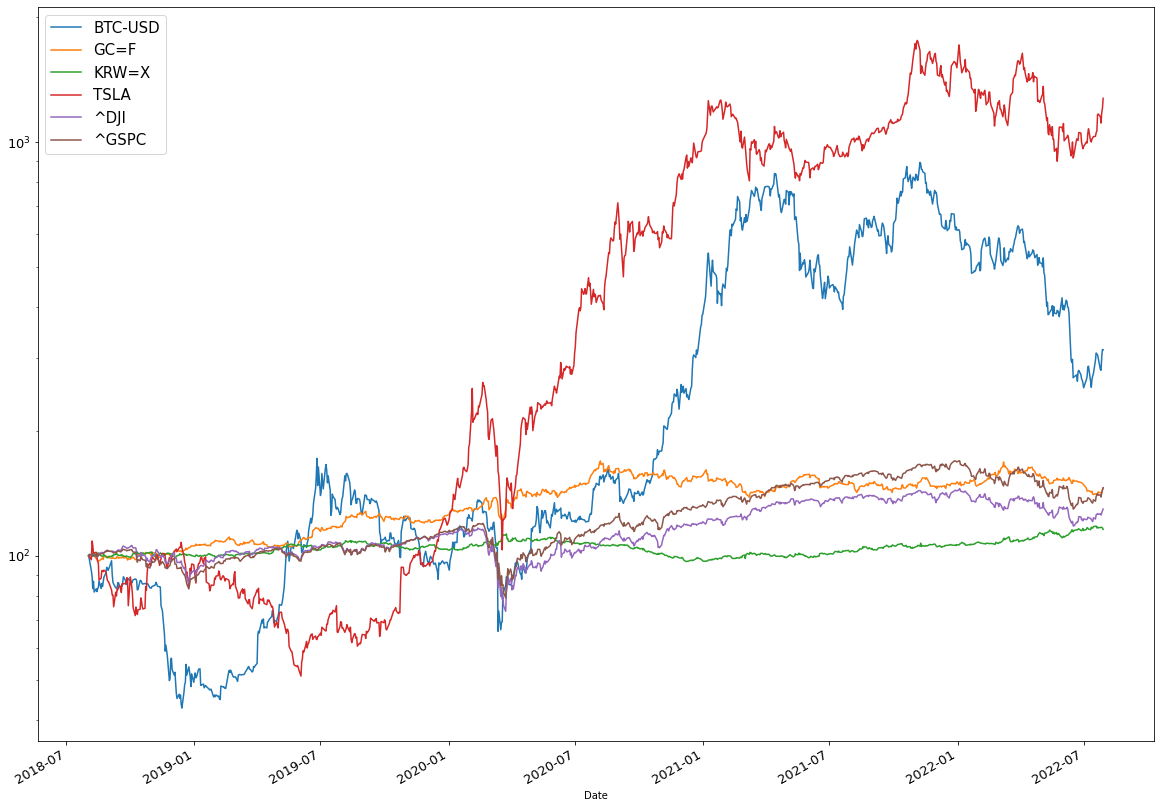

In [11]:
# logy 설정으로 y축 로그 스케일링
norm.dropna().plot(figsize = (20, 15), fontsize = 13, logy=True)

# 범례 위치를 왼쪽 상단으로 이동
plt.legend(loc="upper left", fontsize = 15)

plt.show()

### Tesla vs BitCoin

In [13]:
# 테슬라 종가 데이터만 가져오기
tsla = df.Close.TSLA.dropna().to_frame().copy()

# 컬럼명을 Price로 바꾸기
tsla.rename(columns={"TSLA":"Price"}, inplace=True)

# 수익률 계산해서 추가하기
tsla["Returns"] = tsla.Price.pct_change(periods=1)

In [14]:
tsla

,Price,Returns
Date,,
2018-08-02,23.302668,NaN
2018-08-03,23.211332,-0.003920
2018-08-06,22.799334,-0.017750
2018-08-07,25.304667,0.109886
2018-08-08,24.689333,-0.024317
...,...,...
2022-07-25,268.433319,-0.013995
2022-07-26,258.859985,-0.035664
2022-07-27,274.820007,0.061655


In [15]:
# 비트코인 종가 데이터 가져오기
btc = df.Close["BTC-USD"].dropna().to_frame().copy()

# 컬럼명을 Price로 바꾸기
btc.rename(columns={"BTC-USD":"Price"}, inplace=True)

# 수익률 계산해서 추가하기
btc["Returns"] = btc.Price.pct_change(periods=1)

btc

,Price,Returns
Date,,
2018-08-02,7567.149902,NaN
2018-08-03,7434.390137,-0.017544
2018-08-04,7032.850098,-0.054011
2018-08-05,7068.479980,0.005066
2018-08-06,6951.799805,-0.016507
...,...,...
2022-07-27,22930.548828,0.079605
2022-07-28,23843.886719,0.039831
2022-07-29,23804.632812,-0.001646


In [17]:
display(tsla.describe(), btc.describe())

,Price,Returns
count,1005.000000,1004.000000
mean,137.357305,0.003448
std,118.994999,0.042723
min,11.931333,-0.210628
25%,21.340000,-0.017825
50%,100.871330,0.002137
75%,238.210007,0.022582
max,409.970001,0.198949


,Price,Returns
count,1460.000000,1459.000000
mean,22124.110392,0.001503
std,18359.554398,0.037895
min,3236.761719,-0.371695
25%,7459.406372,-0.015233
50%,10915.869629,0.001224
75%,38713.802734,0.017739
max,67566.828125,0.187465
